[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/monimoyd/1stDNN/blob/master/1stDNN_Monimoy_Changes_1.ipynb)

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D,AveragePooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


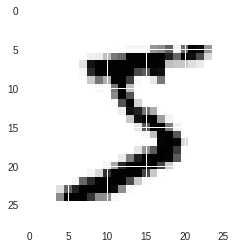

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
from keras.layers import AveragePooling2D
model = Sequential()


model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 1, activation='relu'))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(Convolution2D(16, 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(Convolution2D(10, 3, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Convolution2D(10, 1))


model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserW

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        2080      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 16)        528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 16)        2320      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 10)        170       
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [13]:
model.fit(X_train, Y_train, batch_size=2048, nb_epoch=175, verbose=1)

/usr/local/lib/python3.6/dist-packages/keras/models.py:981: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/175
60000/60000 [==============================] - 9s 152us/step - loss: 2.1976 - acc: 0.1454
Epoch 2/175
60000/60000 [==============================] - 6s 95us/step - loss: 1.7956 - acc: 0.3255
Epoch 3/175
60000/60000 [==============================] - 6s 95us/step - loss: 1.2440 - acc: 0.5448
Epoch 4/175
60000/60000 [==============================] - 6s 95us/step - loss: 0.8105 - acc: 0.7490
Epoch 5/175
60000/60000 [==============================] - 6s 95us/step - loss: 0.5096 - acc: 0.8602
Epoch 6/175
60000/60000 [==============================] - 6s 95us/step - loss: 0.3528 - acc: 0.9024
Epoch 7/175
60000/60000 [==============================] - 6s 95us/step - loss: 0.2782 - acc: 0.9214
Epoch 8/175
60000/60000 [==============================] - 6s 95us/step - loss: 0.2386 - acc: 0.9321
Epoch 9/175
60000/60000 [==============================] - 6s 95us/step - loss: 0.2123 - acc: 0.9395
Epoch 10/175
60000/60000 [==============================] - 6s 95us/step - loss: 0.1944 - 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [19]:
print(score)

[0.03825586722440203, 0.9901]


In [0]:
y_pred = model.predict(X_test)

In [21]:
print(y_pred[:9])
print(y_test[:9])

[[5.5171503e-13 2.2555360e-09 6.9487022e-10 6.7390893e-10 1.3689918e-12
  2.0255163e-07 7.9698479e-16 9.9999762e-01 1.1843820e-08 2.1066608e-06]
 [6.8859277e-05 2.6900489e-07 9.9993038e-01 5.8076304e-09 1.2583326e-10
  7.5631504e-15 4.9261229e-07 1.3895866e-13 3.4094555e-10 8.3323641e-14]
 [4.8776986e-08 9.9992645e-01 9.1783763e-09 4.8031119e-08 2.6954391e-05
  1.3375228e-07 8.3638076e-11 4.4570581e-05 1.5103016e-06 4.3376014e-07]
 [9.9998581e-01 9.2176928e-13 2.2741014e-09 1.3928275e-12 1.0473798e-09
  3.2760022e-07 9.0822732e-06 6.8670819e-16 2.8917635e-10 4.7172753e-06]
 [8.1391404e-12 6.8833723e-12 7.9456103e-12 2.8342937e-16 9.9999952e-01
  2.0314857e-13 8.1751932e-11 8.2959030e-12 1.4022727e-11 4.6344238e-07]
 [1.7934365e-08 9.9996066e-01 6.7856241e-09 2.3586198e-08 1.1524869e-05
  2.7717165e-08 1.9499685e-11 2.7427441e-05 2.3173880e-07 1.4033770e-07]
 [4.7817578e-14 1.1949693e-13 3.8416438e-17 8.7133900e-20 9.9999988e-01
  1.3216892e-13 9.1539254e-13 1.0552576e-12 3.9721565e-10 